In [1]:
# function transfomer

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
import scipy.stats as stats

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [7]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [8]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [14]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [16]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

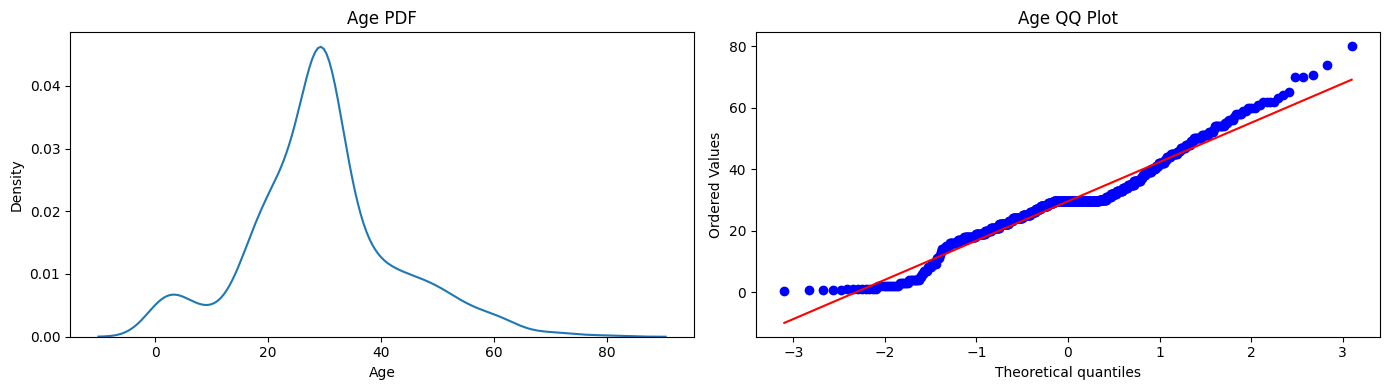

In [36]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.kdeplot(X_train['Age'])  # You can also use sns.kdeplot for just the density curve
plt.title('Age PDF')

# Plot the Age QQ Plot
plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

# Display the plots
plt.tight_layout()
plt.show()

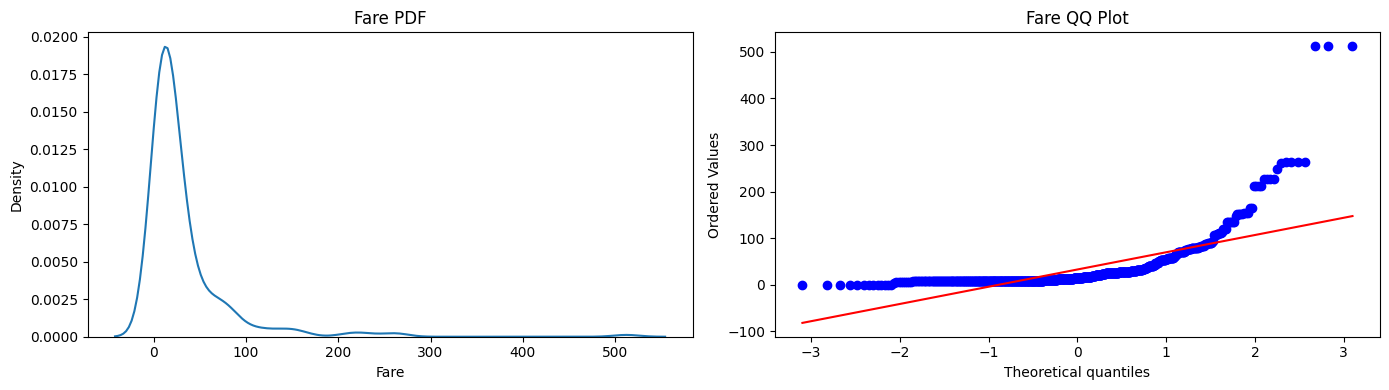

In [37]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.kdeplot(X_train['Fare'])  # You can also use sns.kdeplot for just the density curve
plt.title('Fare PDF')

# Plot the Age QQ Plot
plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

# Display the plots
plt.tight_layout()
plt.show()

In [39]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [40]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DC",accuracy_score(y_test,y_pred1))


Accuracy LR 0.6480446927374302
Accuracy DC 0.659217877094972


In [41]:
trf = FunctionTransformer(func=np.log1p)

In [43]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [44]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DC",accuracy_score(y_test,y_pred1))


Accuracy LR 0.6815642458100558
Accuracy DC 0.664804469273743


In [46]:
X_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DC",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DC 0.658876404494382


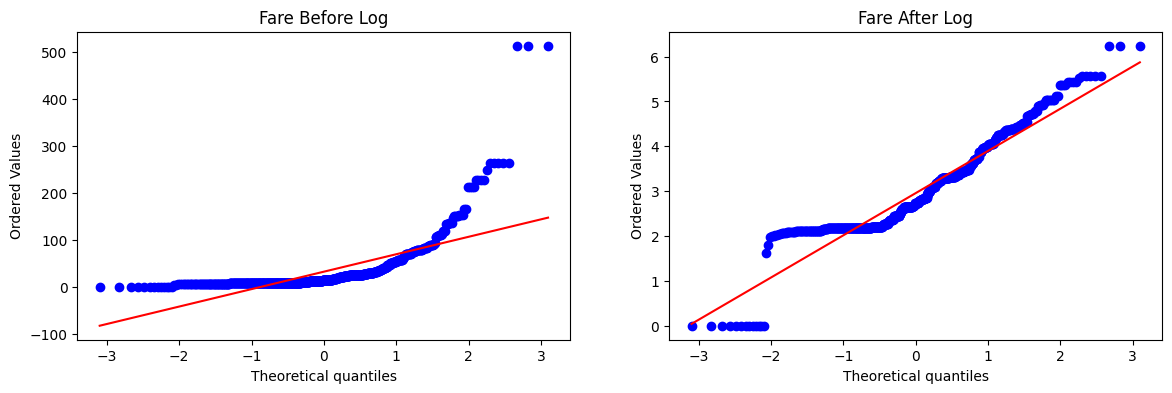

In [48]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)  # You can also use sns.kdeplot for just the density curve
plt.title('Fare Before Log')

# Plot the Age QQ Plot
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log')

# Display the plots
plt.show()

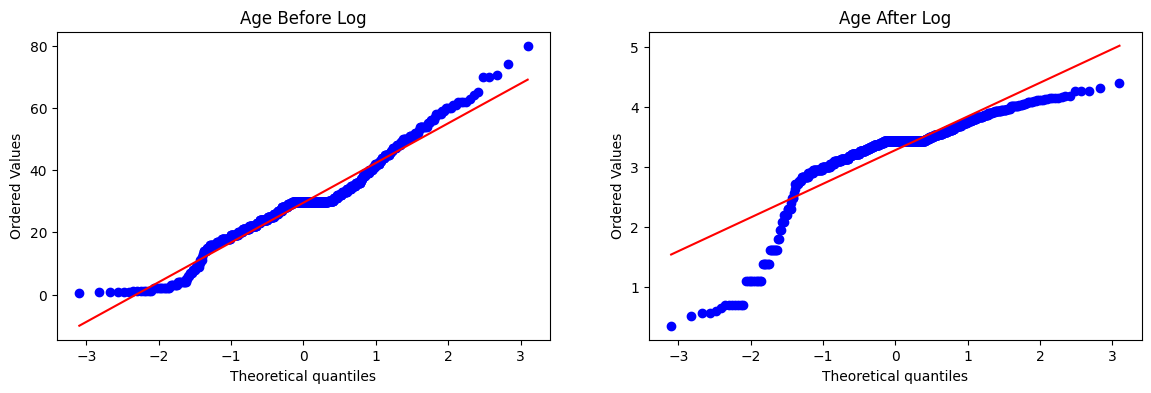

In [50]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)  # You can also use sns.kdeplot for just the density curve
plt.title('Age Before Log')

# Plot the Age QQ Plot
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log')

# Display the plots
plt.show()

In [52]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])], remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)


In [53]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf2.predict(X_test_transformed2)
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DC",accuracy_score(y_test,y_pred1))


Accuracy LR 0.6703910614525139
Accuracy DC 0.6759776536312849


In [54]:
X_transformed2 = trf2.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DC",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DC 0.6599625468164794


In [55]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.61729088639201


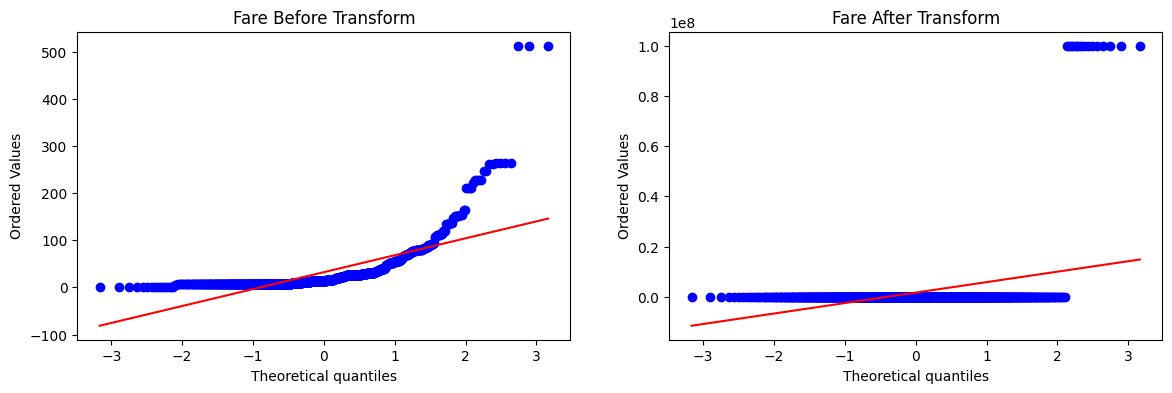

In [67]:
apply_transform(lambda x: 1/(x+0.00000001))

Accuracy 0.6195131086142323


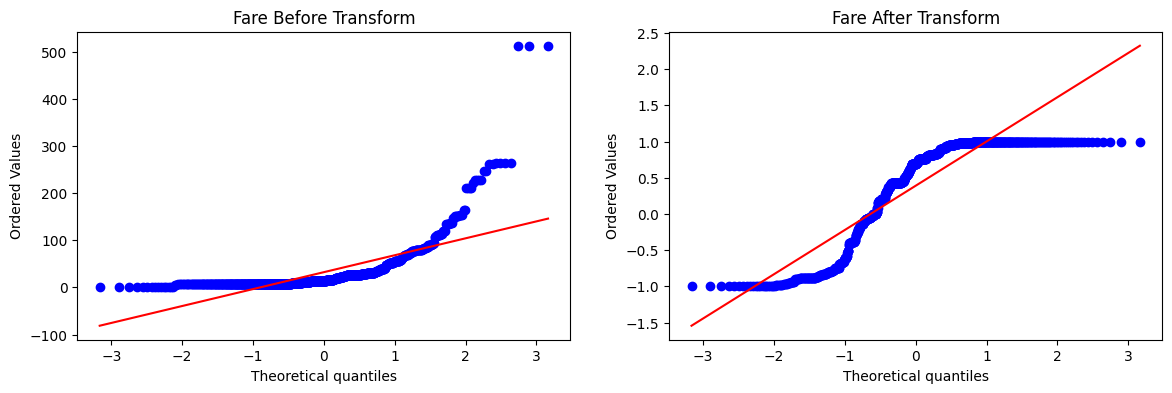

In [56]:
apply_transform(np.sin)
